In [18]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [35]:
import numpy as np

"""This script implements the functions for reading data.
"""

def load_data(filename):
    """Load a given txt file.

    Args:
        filename: A string.

    Returns:
        raw_data: An array of shape [n_samples, 256].
        labels : An array of shape [n_samples,].
        
    """
    data= np.load(filename)
    x= data['x']
    y= data['y']
    return x, y

def train_valid_split(raw_data, labels, split_index):
	"""Split the original training data into a new training dataset
	and a validation dataset.
	n_samples = n_train_samples + n_valid_samples

	Args:
		raw_data: An array of shape [n_samples, 256].
        labels : An array of shape [n_samples,].
		split_index: An integer.

	"""
	return raw_data[:split_index], raw_data[split_index:], labels[:split_index], labels[split_index:]

def prepare_X(raw_X):
    """Extract features from raw_X as required.

    Args:
        raw_X: An array of shape [n_samples, 256].

    Returns:
        X: An array of shape [n_samples, n_features].
    """
    raw_image = raw_X.reshape((-1, 16, 16))

	# Feature 1: Measure of Symmetry
	### YOUR CODE HERE
    symmetry = -np.sum(np.abs(raw_image - np.fliplr(raw_image)), axis=(1, 2)) / 256

	### END YOUR CODE

	# Feature 2: Measure of Intensity
	### YOUR CODE HERE
    intensity = np.sum(raw_image, axis=(1, 2)) / 256
	### END YOUR CODE

	# Feature 3: Bias Term. Always 1.
	### YOUR CODE HERE
    bias = np.ones((raw_image.shape[0], 1))
	### END YOUR CODE

	# Stack features together in the following order.
	# [Feature 3, Feature 1, Feature 2]
	### YOUR CODE HERE
    X = np.hstack((bias,symmetry.reshape(-1,1),intensity.reshape(-1,1)))
	### END YOUR CODE
    return X

def prepare_y(raw_y):
    """
    Args:
        raw_y: An array of shape [n_samples,].
        
    Returns:
        y: An array of shape [n_samples,].
        idx:return idx for data label 1 and 2.
    """
    y = raw_y
    idx = np.where((raw_y==1) | (raw_y==2))
    y[np.where(raw_y==0)] = 0
    y[np.where(raw_y==1)] = 1
    y[np.where(raw_y==2)] = 2

    return y, idx






In [36]:
data_dir = "data/"
train_filename = "training.npz"

In [37]:
raw_data, labels = load_data(os.path.join(data_dir, train_filename))

In [66]:
def visualize_features(X, y):
    '''This function is used to plot a 2-D scatter plot of training features. 

    Args:
        X: An array of shape [n_samples, 2].
        y: An array of shape [n_samples,]. Only contains 1 or -1.

    Returns:
        No return. Save the plot to 'train_features.*' and include it
        in submission.
    '''
    ### YOUR CODE HERE
    # Extract features for class 0 and class 1
    class_1 = X[y == 1]
    class_2 = X[y == -1]

    # Plot features
    plt.figure(figsize=(8, 6))
    plt.scatter(class_1[:, 0], class_1[:, 1], color='green', label='Class 1')
    plt.scatter(class_2[:, 0], class_2[:, 1], color='red', label='Class 2')

    plt.title("Scatter plot of training features")
    plt.xlabel("Measure of Symmetry")
    plt.ylabel("Measure of Intensity")
    plt.legend()
	
    # Save the plot to 'train_features.png'
    plt.savefig('train_features.png')
    plt.show()
    ### END YOUR CODE

In [67]:
    raw_data, labels = load_data(os.path.join(data_dir, train_filename))
    raw_train, raw_valid, label_train, label_valid = train_valid_split(raw_data, labels, 2300)

    ##### Preprocess raw data to extract features
    train_X_all = prepare_X(raw_train)
    valid_X_all = prepare_X(raw_valid)
    ##### Preprocess labels for all data to 0,1,2 and return the idx for data from '1' and '2' class.
    train_y_all, train_idx = prepare_y(label_train)
    valid_y_all, val_idx = prepare_y(label_valid)  



In [68]:
type(train_y_all)

numpy.ndarray

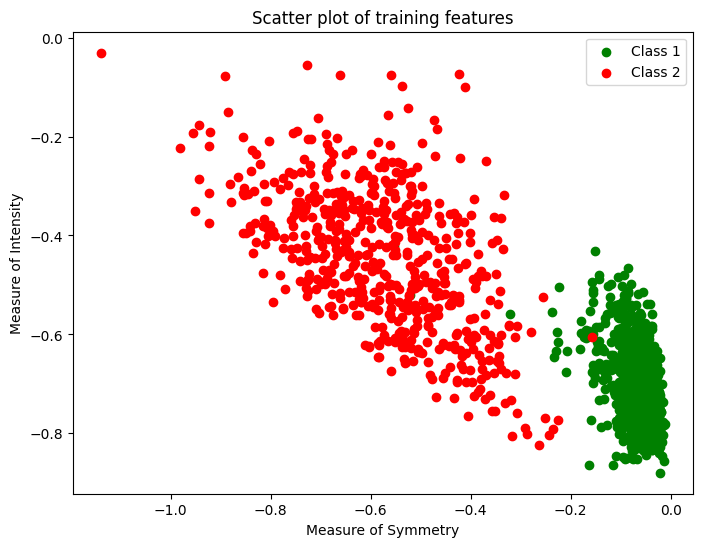

In [69]:
    ####### For binary case, only use data from '1' and '2'  
    train_X = train_X_all[train_idx]
    train_y = train_y_all[train_idx]
    ####### Only use the first 1350 data examples for binary training. 
    train_X = train_X[0:1350]
    train_y = train_y[0:1350]
    valid_X = valid_X_all[val_idx]
    valid_y = valid_y_all[val_idx]
    ####### set lables to  1 and -1. Here convert label '2' to '-1' which means we treat data '1' as postitive class. 
    train_y[np.where(train_y==2)] = -1
    valid_y[np.where(valid_y==2)] = -1
    data_shape= train_y.shape[0] 

#    # Visualize training data.
    visualize_features(train_X[:, 1:3], train_y)

In [53]:
train_y[train_y==1].shap

(784,)

In [80]:
w = np.random.normal(loc=0,scale=0.001,size=(3,1))

In [81]:
w

array([[ 0.00187342],
       [-0.00066957],
       [ 0.00017409]])

In [82]:
train_X_all

array([[ 1.        , -0.05953125, -0.75391406],
       [ 1.        , -0.72316406, -0.42091797],
       [ 1.        , -0.07054688, -0.77228125],
       ...,
       [ 1.        , -0.61173437, -0.348125  ],
       [ 1.        , -0.18285937, -0.34114063],
       [ 1.        , -0.13855469, -0.75471484]])

In [87]:
z = np.dot(train_X_all,w)

In [98]:
probs_1 = 1/(1+np.exp(-z))
probs_neg_1 = 1 - probs_1

In [104]:
y_pred = np.hstack((probs_1,probs_neg_1))

# 

In [105]:
y = train_y_all

In [108]:
cross_entropy = -np.mean(y*np.log(y_pred[:,0])+(1-y)*np.log(y_pred[:,1]))

In [109]:
cross_entropy

0.6924625654564468